In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal , permutation
import pandas as pd
from pandas import DataFrame , Series
np.random.seed(20160614)
tf.set_random_seed(20160614)

In [0]:
def generate_Datablock(n,mu,var,t):
  data=multivariate_normal(mu,np.eye(2)*var,n)
  df = DataFrame(data,columns=['x1','x2'])
  df['t']=t
  return df

In [0]:
df0 = generate_Datablock(15,[7,7],22,0)
df1 = generate_Datablock(15,[22,7],22,0)
df2 = generate_Datablock(10,[7,22],22,0)
df3 = generate_Datablock(25,[20,20],22,1)

df = pd.concat([df0,df1,df2,df3], ignore_index=True)
train_set=df.reindex(permutation(df.index)).reset_index(drop=True)

In [0]:
train_x=train_set[['x1','x2']].to_numpy()
train_t=train_set['t'].to_numpy().reshape([len(train_set),1])

In [0]:
num_units=2
mult=train_x.flatten().mean()

In [0]:
x=tf.placeholder(tf.float32,[None,2])

In [0]:
w1=tf.Variable(tf.truncated_normal([2,num_units]))
b1=tf.Variable(tf.zeros([num_units]))
hidden1=tf.nn.relu(tf.matmul(x,w1)+b1*mult)

w0=tf.Variable(tf.truncated_normal([num_units,1]))
b0=tf.Variable(tf.zeros([1]))
p=tf.nn.sigmoid(tf.matmul(hidden1,w0)+b0*mult)

In [0]:
t = tf.placeholder (tf.float32, [None,1])
loss =-tf.reduce_sum (t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.GradientDescentOptimizer (0.0005).minimize(loss)
correct_prediction = tf.equal( tf.sign (p-0.5), tf.sign (t-0.5))
accuracy =tf.reduce_mean(tf.cast(correct_prediction , tf.float32))

In [16]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [17]:
i=0
for _ in range(4000):
  i+=1
  sess.run(train_step, feed_dict={x:train_x, t:train_t})
  if i%100==0:
    loss_val, acc_val=sess.run([loss,accuracy], feed_dict={x:train_x,t:train_t})
    print('Step:%d, Loss:%f, Accuracy:%f'%(i,loss_val,acc_val))

Step:100, Loss:nan, Accuracy:0.000000
Step:200, Loss:nan, Accuracy:0.000000
Step:300, Loss:nan, Accuracy:0.000000
Step:400, Loss:nan, Accuracy:0.000000
Step:500, Loss:nan, Accuracy:0.000000
Step:600, Loss:nan, Accuracy:0.000000
Step:700, Loss:nan, Accuracy:0.000000
Step:800, Loss:nan, Accuracy:0.000000
Step:900, Loss:nan, Accuracy:0.000000
Step:1000, Loss:nan, Accuracy:0.000000
Step:1100, Loss:nan, Accuracy:0.000000
Step:1200, Loss:nan, Accuracy:0.000000
Step:1300, Loss:nan, Accuracy:0.000000
Step:1400, Loss:nan, Accuracy:0.000000
Step:1500, Loss:nan, Accuracy:0.000000
Step:1600, Loss:nan, Accuracy:0.000000
Step:1700, Loss:nan, Accuracy:0.000000
Step:1800, Loss:nan, Accuracy:0.000000
Step:1900, Loss:nan, Accuracy:0.000000
Step:2000, Loss:nan, Accuracy:0.000000
Step:2100, Loss:nan, Accuracy:0.000000
Step:2200, Loss:nan, Accuracy:0.000000
Step:2300, Loss:nan, Accuracy:0.000000
Step:2400, Loss:nan, Accuracy:0.000000
Step:2500, Loss:nan, Accuracy:0.000000
Step:2600, Loss:nan, Accuracy:0.00

/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:397: UserWarning: Warning: converting a masked element to nan.
  dv = (np.float64(self.norm.vmax) -
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:398: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:405: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/usr/local/lib/python3.6/dist-packages/matplotlib/image.py:410: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.6/dist-packages/numpy/ma/core.py:711: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


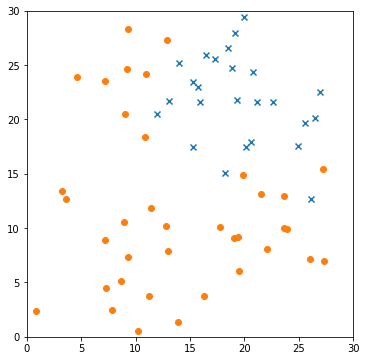

In [18]:
train_set1 = train_set[train_set['t']==1]
train_set2 = train_set[train_set['t']==0]

fig=plt.figure(figsize=(6,6))
subplot=fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set2.x1, train_set2.x2, marker='o')

locations=[]
for x2 in np.linspace(0,30,100):
  for x1 in np.linspace(0,30,100):
    locations.append((x1,x2))
p_vals=sess.run(p,feed_dict={x:locations})
p_vals=p_vals.reshape((100,100))
subplot.imshow(p_vals,origin='lower',extent=(0,30,0,30),cmap=plt.cm.gray_r,alpha=0.5)